# Houra Batool

## Data Science and Business Analytics Intern @ The Sparks Foundation

In [60]:
# importing libraries for visualizing and data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# importing libraries for  training and evaluating model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [61]:
#reading dataset from url
url ="http://bit.ly/w-data"
data = pd.read_csv(url)


In [62]:
#displaying top 10 values
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [63]:
data.shape

(25, 2)

In [64]:
data.isna().sum()
#no null values

Hours     0
Scores    0
dtype: int64

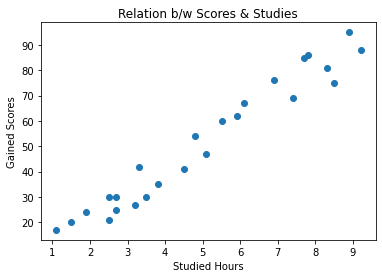

In [65]:
#ploting both attributes
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel("Studied Hours")
plt.ylabel("Gained Scores")
plt.title("Relation b/w Scores & Studies")
plt.show()

#### the graph shows that studied hours and gained scores have positive correlation


In [66]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [67]:
Xtrain,Xtest,ytrain,ytest =train_test_split(X,y,test_size=0.2,random_state=0 )

In [68]:
print(y.shape)
print(X.shape)

(25,)
(25, 1)


#### Fitting Linear Regression Model

In [69]:
# training 
regressor = LinearRegression()
model = regressor.fit(Xtrain, ytrain)

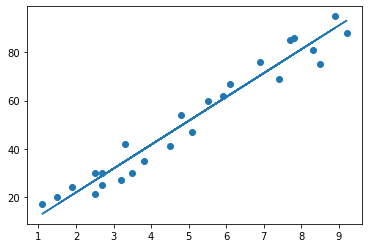

In [70]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [71]:
# predicting the test set results 
y_pred = regressor.predict(Xtest) 

In [72]:
#comparing actual output with predicted output
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_pred.flatten().round(2)})

In [73]:
df

,Actual,Predicted
0,20,16.88
1,27,33.73
2,69,75.36
3,30,26.79
4,62,60.49


## Model Evaluation 

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [98]:
#predicting value of score against the given input value which is 9.25hr\day
hours = [9.25,7.8]
hoursArr= np.array(hours).reshape(-1,1)
model_pred = regressor.predict(hoursArr)
print("No of Hours = {},Predicted Score = {}".format(hours[0],model_pred[0]))
print("No of Hours = {},Predicted Score = {}".format(hours[1],model_pred[1]))

No of Hours = 9.25,Predicted Score = 93.69173248737538
No of Hours = 7.8,Predicted Score = 79.32128059044413
